# Logistic Regression model construction.


*   The election of the model lies in the explainability that is very important for business strategy decisions. It is a robust technique on credit scoring that can asses the probability of default on its way.
*   The procedure combines the techniques of model selection over the variables in WoEs scale. The fisrt step is describing the varibale importance, this has also the objective of answer the business question: *What variables, if any, can be used to create business rules that can be used to decline a customer's application before the model runs?*. The second step was about chosing the variable with high importance and descarting others high correlated until no variables available. A model was evaluated with the choice here. Later, exploring the VIF to evaluate if multicolineality (one variable was deleted here). The variable selection was later addressed by select k=6 best. The variables were analyzed by its statistical relevance and the explainability in the model.
* Finaly, a score evaluation function was provided. The entire data set was evaluated.



# This is the model construction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/USA/NinjaHoldings/Assesment/'

In [4]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
parquet_file_path = path+'outputs/datainput4.parquet'

table = pq.read_table(parquet_file_path)

# Convert the PyArrow Table to a Pandas DataFrame
df = table.to_pandas()
df.head(5)

,id,loan_amnt,term,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,mths_since_last_delinq_bins,mths_since_last_delinq_WOE,months_since_earliest_cr_line_bins,months_since_earliest_cr_line_WOE,installment_bins,installment_WOE,inq_last_12m_bins,inq_last_12m_WOE,earliest_cr_line__bins,earliest_cr_line__WOE
0,88787390,30000,60 months,761.64,6 years,RENT,100100.0,Verified,Sep-2016,Current,...,-0.01-31.0,0.008134,326.0-852.0,0.299529,637.36-790.82,-0.076293,-0.01-1.0,-0.096891,1943-12-31 23:59:59.999999999-1988-08-01 00:00:00,0.226550
1,67919555,16000,60 months,379.39,6 years,RENT,84000.0,Not Verified,Jan-2016,Current,...,31.0-146.0,-0.023232,202.0-230.0,0.087179,329.91-382.55,-0.102815,1.0-36.0,0.395002,1996-09-01 00:00:00-1998-12-01 00:00:00,0.040425
2,54027458,14000,36 months,439.88,5 years,RENT,50000.0,Source Verified,Jul-2015,Fully Paid,...,-0.01-31.0,0.008134,202.0-230.0,0.087179,382.55-459.67,-0.106182,-0.01-1.0,-0.096891,1996-09-01 00:00:00-1998-12-01 00:00:00,0.040425
3,72594974,7500,36 months,252.67,3 years,MORTGAGE,68000.0,Not Verified,Feb-2016,Fully Paid,...,-0.01-31.0,0.008134,181.0-202.0,0.092982,235.61-285.14,0.062403,1.0-36.0,0.395002,2000-09-01 00:00:00-2002-03-01 00:00:00,-0.088931
4,74815224,2800,36 months,94.33,< 1 year,RENT,25000.0,Source Verified,Mar-2016,Current,...,-0.01-31.0,0.008134,104.0-128.0,-0.155413,30.11-166.77,0.342067,-0.01-1.0,-0.096891,2005-03-01 00:00:00-2007-03-01 00:00:00,-0.091597


In [ ]:
df.to_csv(path+'outputs/final_creditscore_input.csv')

## Variable Selection


In [5]:
woesvars=[x for x in df.columns if 'WOE' in x and 'iss' not in x]
woesvars, len(woesvars)

(['term_WOE',
  'emp_length_WOE',
  'home_ownership_WOE',
  'verification_status_WOE',
  'addr_state_WOE',
  'purpose_class_WOE',
  'geograph_cluster_WOE',
  'employment_years_cat_WOE',
  'loan_amnt_WOE',
  'annual_inc_WOE',
  'dti_WOE',
  'fico_range_low_WOE',
  'fico_range_high_WOE',
  'last_fico_range_high_WOE',
  'last_fico_range_low_WOE',
  'mths_since_last_delinq_WOE',
  'months_since_earliest_cr_line_WOE',
  'installment_WOE',
  'inq_last_12m_WOE',
  'earliest_cr_line__WOE'],
 20)

In [6]:
input=df[['y']+woesvars]


input.head(5)

,y,term_WOE,emp_length_WOE,home_ownership_WOE,verification_status_WOE,addr_state_WOE,purpose_class_WOE,geograph_cluster_WOE,employment_years_cat_WOE,loan_amnt_WOE,...,dti_WOE,fico_range_low_WOE,fico_range_high_WOE,last_fico_range_high_WOE,last_fico_range_low_WOE,mths_since_last_delinq_WOE,months_since_earliest_cr_line_WOE,installment_WOE,inq_last_12m_WOE,earliest_cr_line__WOE
0,0,2.194182,2.530314,2.362929,2.232915,2.733904,2.422965,2.533445,2.487256,-0.194031,...,-0.264515,0.023299,0.023299,1.866607,1.866607,0.008134,0.299529,-0.076293,-0.096891,0.226550
1,0,2.194182,2.530314,2.362929,2.894069,2.500146,2.422965,2.533445,2.487256,-0.141337,...,-0.264515,0.474093,0.474093,2.797331,2.797331,-0.023232,0.087179,-0.102815,0.395002,0.040425
2,0,2.671585,2.522647,2.362929,2.480700,2.674149,2.422965,2.533445,2.487256,0.008515,...,-0.099415,0.474093,0.474093,2.797331,2.797331,0.008134,0.087179,-0.106182,-0.096891,0.040425
3,0,2.671585,2.486511,2.639946,2.894069,2.556732,2.422965,2.533445,2.487256,0.080903,...,-0.264515,-0.364344,-0.364344,1.866607,1.866607,0.008134,0.092982,0.062403,0.395002,-0.088931
4,0,2.671585,2.357103,2.362929,2.480700,3.026504,2.490468,2.952684,2.390828,0.209392,...,-0.410558,-0.186868,-0.186868,1.412315,1.412315,0.008134,-0.155413,0.342067,-0.096891,-0.091597


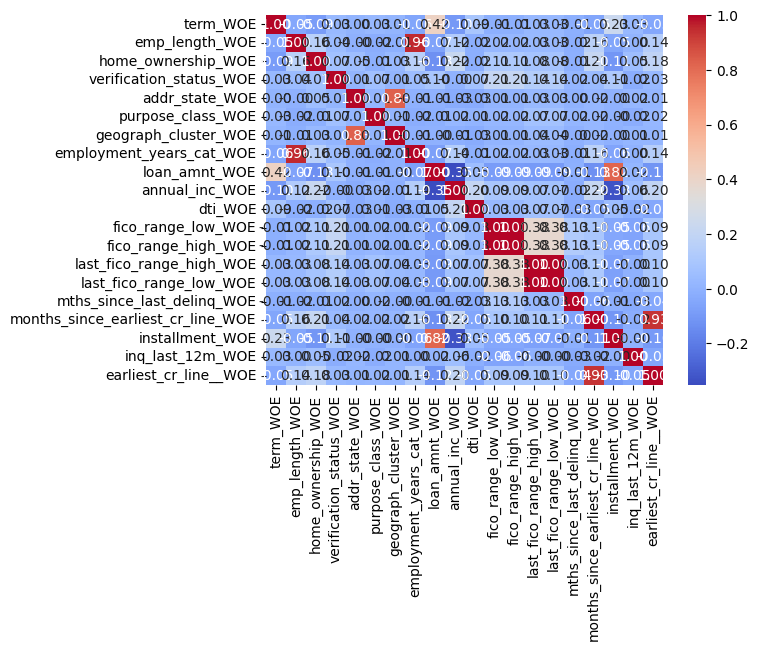

In [7]:
import pandas as pd

correlation_matrix = input[woesvars].corr()

correlation_matrix.to_csv(path+'outputs/varwoes_correlations.csv')

import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

df11= input


X = df11.drop('y', axis=1)
y = df11['y']

#### Feature importance

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     21166
           1       0.63      0.54      0.58      1722

    accuracy                           0.94     22888
   macro avg       0.80      0.76      0.77     22888
weighted avg       0.94      0.94      0.94     22888



In [12]:
import joblib


joblib.dump(rf_classifier, path+"outputs/random_forest.joblib")

['/content/drive/MyDrive/USA/NinjaHoldings/Assesment/outputs/random_forest.joblib']

                              Feature  Importance
14            last_fico_range_low_WOE       0.198
13           last_fico_range_high_WOE       0.192
4                      addr_state_WOE       0.071
10                            dti_WOE       0.055
9                      annual_inc_WOE       0.054
1                      emp_length_WOE       0.046
16  months_since_earliest_cr_line_WOE       0.046
17                    installment_WOE       0.045
8                       loan_amnt_WOE       0.045
19              earliest_cr_line__WOE       0.045
11                 fico_range_low_WOE       0.034
12                fico_range_high_WOE       0.034
3             verification_status_WOE       0.024
5                   purpose_class_WOE       0.022
2                  home_ownership_WOE       0.022
7            employment_years_cat_WOE       0.018
15         mths_since_last_delinq_WOE       0.015
18                   inq_last_12m_WOE       0.012
6                geograph_cluster_WOE       0.012


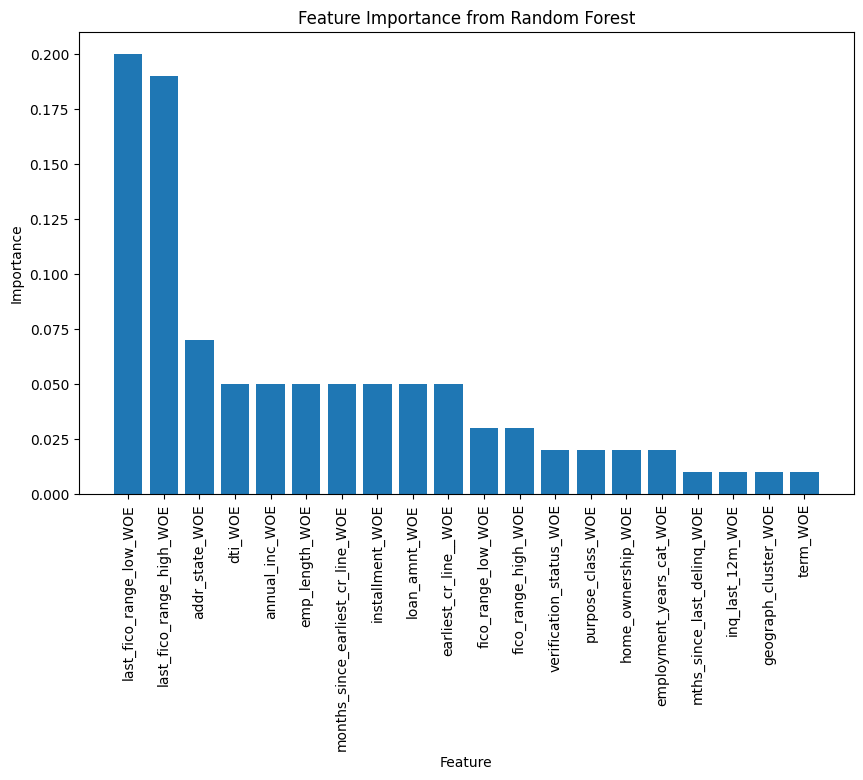

In [13]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df.round(3))

# Optionally, plot the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'].round(2))
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


In [ ]:
joblib.dump(rf_classifier, "./random_forest.joblib")

In [14]:
feat_impo=feature_importance_df.round(2)
feat_impo

,Feature,Importance
14,last_fico_range_low_WOE,0.20
13,last_fico_range_high_WOE,0.19
4,addr_state_WOE,0.07
10,dti_WOE,0.05
9,annual_inc_WOE,0.05
1,emp_length_WOE,0.05
16,months_since_earliest_cr_line_WOE,0.05
17,installment_WOE,0.05
8,loan_amnt_WOE,0.05
19,earliest_cr_line__WOE,0.05


#### Criteria 1 for selection, the most importance and low correlation (thr .4)

In [ ]:
feat_impo=feature_importance_df.round(2)
correlation_matrix= df11[woesvars].corr()

correlation_matrix=correlation_matrix.reset_index()

# Iterate through variables based on importance
selected_variables = []
while feat_impo.shape[0] > 0:
    # Select variable with highest importance

    current_variable = feat_impo.loc[feat_impo['Importance'].idxmax(), 'Feature']
    selected_variables.append(current_variable)

    # Remove the selected variable from importance_df
    feat_impo = feat_impo[feat_impo['Feature'] != current_variable]

    # Remove variables highly correlated with the current variable
    correlation_threshold = 0.25
    correlated_vars = correlation_matrix[correlation_matrix[current_variable].abs() >= correlation_threshold]['index'].values
    feat_impo = feat_impo[~feat_impo['Feature'].isin(correlated_vars)]

print("Selected Variables:", selected_variables)
selected_variables

Selected Variables: ['last_fico_range_high_WOE', 'addr_state_WOE', 'annual_inc_WOE', 'months_since_earliest_cr_line_WOE', 'dti_WOE', 'emp_length_WOE', 'verification_status_WOE', 'home_ownership_WOE', 'purpose_class_WOE', 'mths_since_last_delinq_WOE', 'inq_last_12m_WOE', 'term_WOE']


['last_fico_range_high_WOE',
 'addr_state_WOE',
 'annual_inc_WOE',
 'months_since_earliest_cr_line_WOE',
 'dti_WOE',
 'emp_length_WOE',
 'verification_status_WOE',
 'home_ownership_WOE',
 'purpose_class_WOE',
 'mths_since_last_delinq_WOE',
 'inq_last_12m_WOE',
 'term_WOE']

### Model 1 with those variables

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


X = input[list(selected_variables)]
y = input['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model using the selected features
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Use the trained Logistic Regression model for predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model on the test set
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[13670   456]
 [  466   667]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14126
           1       0.59      0.59      0.59      1133

    accuracy                           0.94     15259
   macro avg       0.78      0.78      0.78     15259
weighted avg       0.94      0.94      0.94     15259



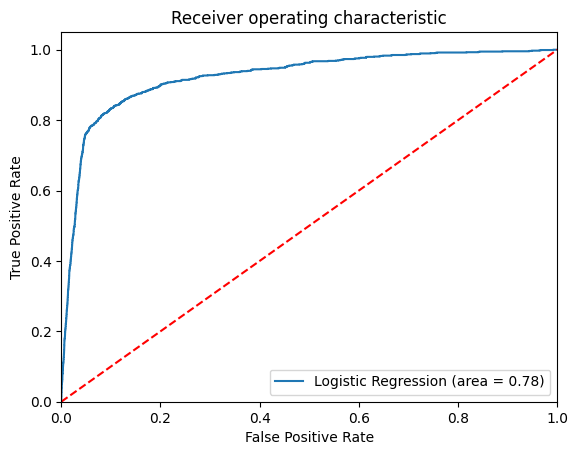

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
coefficients = logreg_model.coef_[0]
p_values = logreg_model.predict_proba(X_train)  # Extract p-values from predicted probabilities

# Create a DataFrame to display the results
import pandas as pd

feature_names = X.columns
result_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
result_df['Odds Ratio'] = result_df['Coefficient'].apply(lambda x: round(np.exp(x), 4))


print(result_df)

                              Feature  Coefficient  Odds Ratio
0            last_fico_range_high_WOE    -0.984165      0.3738
1                      addr_state_WOE    -0.807829      0.4458
2                      annual_inc_WOE    -0.125387      0.8822
3   months_since_earliest_cr_line_WOE     0.393841      1.4827
4                             dti_WOE    -0.582158      0.5587
5                      emp_length_WOE    -0.483635      0.6165
6             verification_status_WOE    -0.210762      0.8100
7                  home_ownership_WOE    -0.364849      0.6943
8                   purpose_class_WOE    -0.114584      0.8917
9          mths_since_last_delinq_WOE    -0.136974      0.8720
10                   inq_last_12m_WOE    -0.637573      0.5286
11                           term_WOE    -0.966495      0.3804


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] =  selected_variables
#X.columns
vif["VIF"] = [variance_inflation_factor(X[selected_variables].values, i)
              for i in range(X[selected_variables].shape[1])]
vif

,Variable,VIF
0,last_fico_range_high_WOE,1.717707
1,addr_state_WOE,222.746906
2,annual_inc_WOE,1.166245
3,months_since_earliest_cr_line_WOE,1.101228
4,dti_WOE,1.093199
5,emp_length_WOE,547.954416
6,verification_status_WOE,99.699659
7,home_ownership_WOE,361.321013
8,purpose_class_WOE,272.044098
9,mths_since_last_delinq_WOE,1.008422


 We have multicolineality

In [ ]:
selected_variables

['last_fico_range_high_WOE',
 'addr_state_WOE',
 'annual_inc_WOE',
 'months_since_earliest_cr_line_WOE',
 'dti_WOE',
 'emp_length_WOE',
 'verification_status_WOE',
 'home_ownership_WOE',
 'purpose_class_WOE',
 'mths_since_last_delinq_WOE',
 'inq_last_12m_WOE',
 'term_WOE']

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df11[selected_variables]
y = df11['y']


selector = SelectKBest(score_func=f_classif, k=6)

# Fit
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

print("Selected Features:", selected_features)


Selected Features: Index(['last_fico_range_high_WOE', 'months_since_earliest_cr_line_WOE',
       'dti_WOE', 'verification_status_WOE', 'inq_last_12m_WOE', 'term_WOE'],
      dtype='object')


In [ ]:

vif = pd.DataFrame()
vif["Variable"] =  selected_features
#X.columns
vif["VIF"] = [variance_inflation_factor(X[selected_features].values, i)
              for i in range(X[selected_features].shape[1])]
vif

,Variable,VIF
0,last_fico_range_high_WOE,1.705965
1,months_since_earliest_cr_line_WOE,1.024175
2,dti_WOE,1.018675
3,verification_status_WOE,59.927820
4,inq_last_12m_WOE,1.008806
5,term_WOE,59.014211


## The final model

In [ ]:
selected_variables3=['last_fico_range_high_WOE', 'months_since_earliest_cr_line_WOE',
       'dti_WOE', 'inq_last_12m_WOE', 'term_WOE']

X = input[list(selected_variables)]
y = input['y']
# Check for multicollinearity
vif = pd.DataFrame()
vif["Variable"] =  selected_variables3
#X.columns
vif["VIF"] = [variance_inflation_factor(X[selected_variables3].values, i)
              for i in range(X[selected_variables3].shape[1])]
vif

,Variable,VIF
0,last_fico_range_high_WOE,1.679635
1,months_since_earliest_cr_line_WOE,1.021543
2,dti_WOE,1.018629
3,inq_last_12m_WOE,1.007940
4,term_WOE,1.661568


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


X = input[list(selected_variables3)]
y = input['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Use the trained Logistic Regression model for predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model on the test set
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[20493   673]
 [  693  1029]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     21166
           1       0.60      0.60      0.60      1722

    accuracy                           0.94     22888
   macro avg       0.79      0.78      0.78     22888
weighted avg       0.94      0.94      0.94     22888



In [ ]:
coefficients = logreg_model.coef_[0]
p_values = logreg_model.predict_proba(X_train)  # Extract p-values from predicted probabilities

# Create a DataFrame to display the results
import pandas as pd

feature_names = X.columns
result_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
result_df['Odds Ratio'] = result_df['Coefficient'].apply(lambda x: round(np.exp(x), 4))

print(result_df)

                             Feature  Coefficient  Odds Ratio
0           last_fico_range_high_WOE    -0.981728      0.3747
1  months_since_earliest_cr_line_WOE     0.221828      1.2484
2                            dti_WOE    -0.592458      0.5530
3                   inq_last_12m_WOE    -0.675354      0.5090
4                           term_WOE    -0.928030      0.3953


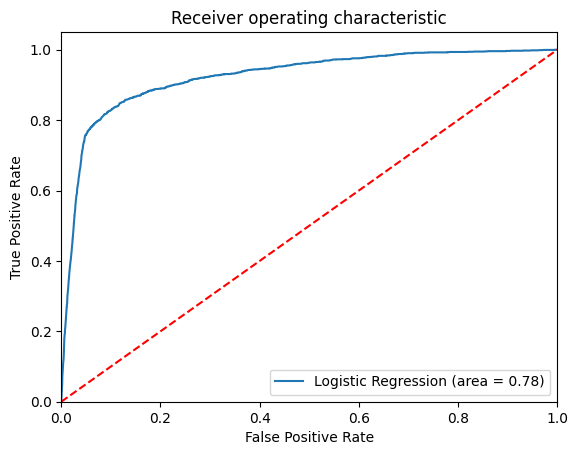

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
dict_coefficients={}
for i in range(0, len(feature_names)):
  dict_coefficients[feature_names[i]]=coefficients[i]

dict_coefficients

{'last_fico_range_high_WOE': -0.9817281074578188,
 'months_since_earliest_cr_line_WOE': 0.22182751474071263,
 'dti_WOE': -0.5924579978421471,
 'inq_last_12m_WOE': -0.6753541959037433,
 'term_WOE': -0.9280301481444228}

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

selected_variables3=['last_fico_range_high_WOE', 'months_since_earliest_cr_line_WOE',
       'dti_WOE', 'inq_last_12m_WOE', 'term_WOE']
X = df[selected_variables3]
y = df['y']

logreg_classifier = LogisticRegression()

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)}

# Create a stratified K-Folds cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
results = cross_validate(logreg_classifier, X, y, cv=cv, scoring=scoring)

# Display the results
print(f'Accuracy: {results["test_accuracy"].mean()}')
print(f'Precision: {results["test_precision"].mean()}')
print(f'Recall: {results["test_recall"].mean()}')
print(f'F1 Score: {results["test_f1_score"].mean()}')


Accuracy: 0.9385919752831416
Precision: 0.5907812561359187
Recall: 0.6060473690174895
F1 Score: 0.598142241535429


In [ ]:
results

{'fit_time': array([0.27733564, 0.37576318, 0.30186343, 0.31119132, 0.21930265]),
 'score_time': array([0.07906699, 0.0708437 , 0.03598309, 0.07667184, 0.07326365]),
 'test_accuracy': array([0.93682417, 0.94272233, 0.93865915, 0.93832743, 0.93642679]),
 'test_precision': array([0.57635468, 0.6209607 , 0.59041211, 0.59288889, 0.5732899 ]),
 'test_recall': array([0.61043478, 0.61772372, 0.60990443, 0.58      , 0.61217391]),
 'test_f1_score': array([0.59290541, 0.61933798, 0.6       , 0.58637363, 0.5920942 ])}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



# Create a logistic regression model
logreg_model = LogisticRegression()

#  grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2']}

#  grid searc
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Access the best estimator (model with best hyperparameters)
best_logreg_model = grid_search.best_estimator_

# Access the coefficients and intercept of the best model
coefficients = best_logreg_model.coef_
intercept = best_logreg_model.intercept_

#
for feature, coef in zip(X_train.columns, coefficients[0]):
    print(f"{feature}: {coef}")


print(f"Intercept: {intercept}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

last_fico_range_high_WOE: -0.9802881227926592
months_since_earliest_cr_line_WOE: 0.19950877324958569
dti_WOE: -0.5582188013544902
inq_last_12m_WOE: -0.6154840377547729
term_WOE: -0.8695614957308108
Intercept: [-0.2966303]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the target values using the best logistic regression model
y_pred = best_logreg_model.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9406675987416987
Precision: 0.6038812785388128
Recall: 0.6144018583042973
F1 Score: 0.6090961427748992


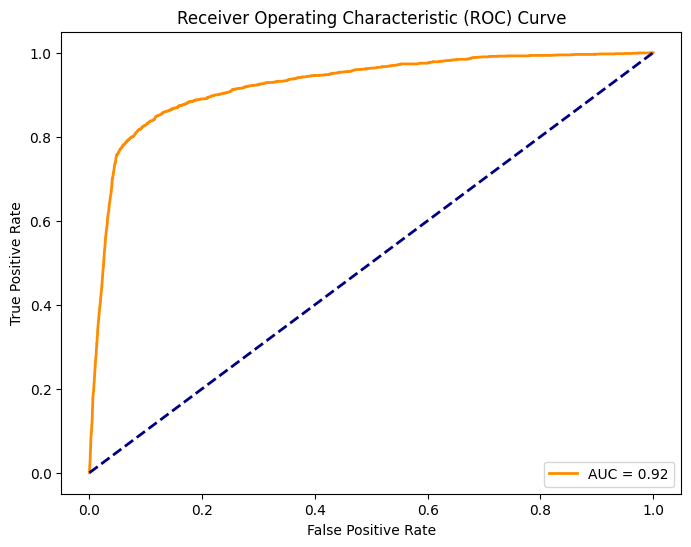

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have y_test and y_pred_proba defined
y_pred_proba = best_logreg_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Scoring example

In [ ]:
import pandas as pd


def find_woe_for_value(input_value, column_name):

    # Convert the column to numeric (if not already)
    if column_name+'_bins' in dft.columns:
      print(f"here already ")
      dframe = dft.groupby(column_name+'_bins')[column_name+'_WOE'].mean().reset_index()
      print('======================================', dframe)
      dframe['low']=dframe[column_name+'_bins'].apply(lambda x: float(x.split(',')[0][1:]))
      dframe['upp']=dframe[column_name+'_bins'].apply(lambda x: float(x.split(',')[1][:-1]))

      #print('1*****',dframe)
      result_row = dframe[dframe['upp']>input_value]

      #print('2*****',result_row)
      result_row1 = result_row[result_row['low']<=float(input_value)]
      #print('3*****',result_row1)
      if len(result_row1)>0:
        r=result_row1[column_name+'_WOE'].values
        print(f"+++++++++++++++++++++ {r[0]} ++++++++++++++++++")
        return float(r[0])
      else:
        return 0
    else:
      print(f"The variable is not here")
      return 0
    #f"The input value {input_value} belongs to the bin {result_row[column_name+'_bins'].values} with WOE value {resul}"


def probability(input, coefficients):
  tot=0
  #print(f"This is the input {input}")
  for k, val in input.items():
    print(f"******************** {k}***  {val} *************************")
    if 'term' not in k:
        woe=find_woe_for_value(val, k)
    else:
        if val<37:
          woe=2.671585
        else:
          woe=2.194182

    print(f" {woe*coefficients[k]} The woe is {woe}, {coefficients[k]}")

    tot+=woe*coefficients[k]

    print(f"Accumulative tot: {tot} ")

  probabdefault = 1 / (1 + np.exp(-(tot)))

  return probabdefault


In [ ]:
dft=df

In [ ]:
print(dft.columns, len(dft))

Index(['id', 'loan_amnt', 'term', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low', 'acc_now_delinq',
       'delinq_amnt', 'delinq_2yrs', 'mths_since_last_delinq',
       'mths_since_last_record', 'inq_last_6mths', 'inq_last_12m', 'Date',
       'earliest_cr_line_', 'last_credit_pull_d_', 'months_with_cn_loan',
       'months_since_earliest_cr_line', 'employment_length_ordinal', 'label',
       'y', 'Lat', 'Lon', 'defrte_geog', 'purpose_class', 'geograph_cluster',
       'employment_years_cat', 'term_WOE', 'emp_length_WOE',
       'home_ownership_WOE', 'verification_status_WOE', 'issue_d_WOE',
       'addr_state_WOE', 'purpose_class_WOE', 'geograph_cluster_WOE',
       'employment_years_cat_WOE', 'loan_amnt_bins', 'loan_amnt_WOE',
       'annu

In [ ]:
vars=[x.replace('_WOE','') for x in list(dict_coefficients.keys())]
vars

['last_fico_range_high',
 'months_since_earliest_cr_line',
 'dti',
 'inq_last_12m',
 'term']

In [ ]:
# Getting the logit scores
logit_scores_test = best_logreg_model.decision_function(X_test)

print(logit_scores_test)


[-4.47689409 -2.81296118  0.29167252 ... -4.88119314 -4.15626574
 -2.42798345]


In [ ]:
dict_coefficients = {'last_fico_range_high': -0.9802881227926592,
 'months_since_earliest_cr_line': 0.19950877324958569,
 'dti': -0.5582188013544902,
 'inq_last_12m': -0.6154840377547729,
 'term': -0.8695614957308108}



coefficients = dict_coefficients

In [ ]:
def calculate_scaling_factor(target_range, logistic_scores):
    logistic_score_range = np.max(logistic_scores) - np.min(logistic_scores)
    return target_range / logistic_score_range



In [ ]:


def evaluating(user_input):
    woe_values = {}

    # Calculate WOE values for each variable
    for k, val in user_input.items():
        print(f"******************** {k}***  {val} *************************")
        if 'term' not in k:
            woe = find_woe_for_value(val, k)
        else:
            if val < 37:
                woe = 2.671585
            else:
                woe = 2.194182

        print(f"******** {woe} ----- {coefficients[k]}")
        woe_values[k] = woe

    # Base score and logistic regression score
    base_score = 650
    logit_score = sum(-woe_values[var] * coefficients[var] for var in user_input.keys())

    target_range = [600, 850]


    # Find the minimum and maximum logistic scores in the test set
    min_logit_score = np.percentile(logit_scores_test,10)
    max_logit_score = np.percentile(logit_scores_test,90)


    # Logistic function to convert log-odds to probability
    probability = 1 / (1 + np.exp(logit_score))


    # Calculate the scaling factor
    scaling_factor = calculate_scaling_factor(target_range[1] - target_range[0], logit_scores_test)
    print(f"scaling_factor  {scaling_factor}")
    # Convert logistic score to credit score using the scorecard
    credit_score = base_score + (scaling_factor * logit_score)

    print(f"User input {user_input}")
    print(f"Credit-ninja Score: {credit_score:.2f}")
    print(f"Probability of default: {probability:.4f}")
    print(f"logit_score: {logit_score:.4f}")

    output = {"Userinput": user_input,
            "Credit-ninja Score":credit_score,
            "Probability of default":probability,
            "logit_score":logit_score}
    return output

In [ ]:
import numpy as np

# User input values
user_input1 = {
    "last_fico_range_high": 750,
    "months_since_earliest_cr_line": 36,
    "dti": 25,
    "inq_last_12m": 2,
    "term": 36
}

user_input2 = {
    "last_fico_range_high": 750,
    "months_since_earliest_cr_line": 36,
    "dti": 25,
    "inq_last_12m": 2,
    "term": 60
}

user_input3 = {
    "last_fico_range_high": 500,
    "months_since_earliest_cr_line": 36,
    "dti": 30,
    "inq_last_12m": 30,
    "term": 36
}

user_input4 = {
    "last_fico_range_high": 500,
    "months_since_earliest_cr_line": 36,
    "dti": 30,
    "inq_last_12m": 30,
    "term": 60
}

outpus=[]
for input in [user_input1, user_input2, user_input3, user_input4]:
  out=evaluating(input)
  outpus.append(out)

******************** last_fico_range_high***  750 *************************
here already 
======================================   last_fico_range_high_bins  last_fico_range_high_WOE
0            (-0.01, 624.0]                 -2.728683
1            (624.0, 659.0]                 -0.059241
2            (659.0, 674.0]                  0.927216
3            (674.0, 684.0]                  1.412315
4            (684.0, 699.0]                  1.607875
5            (699.0, 709.0]                  1.866607
6            (709.0, 719.0]                  2.048232
7            (719.0, 734.0]                  2.481284
8            (734.0, 759.0]                  2.797331
9            (759.0, 850.0]                  3.081939
+++++++++++++++++++++ 2.7973305156198247 ++++++++++++++++++
******** 2.7973305156198247 ----- -0.9802881227926592
******************** months_since_earliest_cr_line***  36 *************************
here already 
======================================   months_since_earliest_cr

In [ ]:
outpus

[{'Userinput': {'last_fico_range_high': 750,
   'months_since_earliest_cr_line': 36,
   'dti': 25,
   'inq_last_12m': 2,
   'term': 36},
  'Credit-ninja Score': 842.4244443353805,
  'Probability of default': 0.004885462928373641,
  'logit_score': 5.316593796887563},
 {'Userinput': {'last_fico_range_high': 750,
   'months_since_earliest_cr_line': 36,
   'dti': 25,
   'inq_last_12m': 2,
   'term': 60},
  'Credit-ninja Score': 827.3995230452344,
  'Probability of default': 0.007380818624585254,
  'logit_score': 4.9014625301411865},
 {'Userinput': {'last_fico_range_high': 500,
   'months_since_earliest_cr_line': 36,
   'dti': 30,
   'inq_last_12m': 30,
   'term': 36},
  'Credit-ninja Score': 642.6156098538268,
  'Probability of default': 0.5508305718831615,
  'logit_score': -0.20402710778530597},
 {'Userinput': {'last_fico_range_high': 500,
   'months_since_earliest_cr_line': 36,
   'dti': 30,
   'inq_last_12m': 30,
   'term': 60},
  'Credit-ninja Score': 627.5906885636807,
  'Probability 

In [ ]:
user_input.keys()

dict_keys(['last_fico_range_high', 'months_since_earliest_cr_line', 'dti', 'inq_last_12m', 'term'])

## Check of the bins

In [ ]:
df.groupby(['last_fico_range_high_bins'])['last_fico_range_high_WOE'].describe()

,count,mean,std,min,25%,50%,75%,max
last_fico_range_high_bins,,,,,,,,
"(-0.01, 624.0]",7724.0,-2.728683,8.882359e-16,-2.728683,-2.728683,-2.728683,-2.728683,-2.728683
"(624.0, 659.0]",8075.0,-0.059241,2.775729e-17,-0.059241,-0.059241,-0.059241,-0.059241,-0.059241
"(659.0, 674.0]",8287.0,0.927216,2.220580e-16,0.927216,0.927216,0.927216,0.927216,0.927216
"(674.0, 684.0]",6932.0,1.412315,2.220606e-16,1.412315,1.412315,1.412315,1.412315,1.412315
"(684.0, 699.0]",10329.0,1.607875,4.441107e-16,1.607875,1.607875,1.607875,1.607875,1.607875
"(699.0, 709.0]",6665.0,1.866607,0.000000e+00,1.866607,1.866607,1.866607,1.866607,1.866607
"(709.0, 719.0]",6054.0,2.048232,4.441259e-16,2.048232,2.048232,2.048232,2.048232,2.048232
"(719.0, 734.0]",7234.0,2.481284,4.441199e-16,2.481284,2.481284,2.481284,2.481284,2.481284
"(734.0, 759.0]",7479.0,2.797331,8.882378e-16,2.797331,2.797331,2.797331,2.797331,2.797331


In [ ]:
df.groupby('inq_last_12m_bins')['inq_last_12m_WOE'].mean().reset_index()

,inq_last_12m_bins,inq_last_12m_WOE
0,"(-0.01, 1.0]",-0.096891
1,"(1.0, 36.0]",0.395002


In [ ]:
df.groupby('term')['term_WOE'].mean().reset_index()

,term,term_WOE
0,36 months,2.671585
1,60 months,2.194182


In [ ]:
df.groupby('months_since_earliest_cr_line_bins')['months_since_earliest_cr_line_WOE'].mean().reset_index().sort_values('months_since_earliest_cr_line_WOE')

,months_since_earliest_cr_line_bins,months_since_earliest_cr_line_WOE
9,"(35.99, 104.0]",-0.262151
0,"(104.0, 128.0]",-0.155413
1,"(128.0, 146.0]",-0.119312
2,"(146.0, 163.0]",-0.108010
3,"(163.0, 181.0]",-0.002421
5,"(202.0, 230.0]",0.087179
4,"(181.0, 202.0]",0.092982
6,"(230.0, 263.0]",0.143209
7,"(263.0, 326.0]",0.146595
8,"(326.0, 852.0]",0.299529


In [ ]:
df.groupby('dti_bins')['dti_WOE'].mean().reset_index().sort_values('dti_WOE')

,dti_bins,dti_WOE
8,"(31.17, 100.09]",-0.410558
7,"(26.91, 31.17]",-0.264515
5,"(21.04, 23.69]",-0.099415
6,"(23.69, 26.91]",-0.079041
4,"(18.56, 21.04]",0.054358
3,"(16.24, 18.56]",0.066955
2,"(13.87, 16.24]",0.154820
9,"(8.01, 11.25]",0.220592
1,"(11.25, 13.87]",0.258881
0,"(-0.01, 8.01]",0.310747
